In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from math import log
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)


np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

In [2]:
mn = multivariate_normal(mean=[-0.5,-0.5], cov= 0.5)
mn2 = multivariate_normal(mean=[1,1],cov = 0.3)

In [3]:
def draw_samples(model, sample_size):
    samples = []
    for i in range(sample_size):
        sample = model.rvs()
        samples.append(sample)
    return np.array(samples)

In [4]:
tol = 0.01
max_iter = 500
elbo_prev = -10000

In [5]:
aaa = draw_samples(mn,100)
bbb = draw_samples(mn2,100)


In [6]:
# plt.plot(aaa[:,0],aaa[:,1],'ro')
# plt.plot(bbb[:,0],bbb[:,1],'ob')

In [7]:
test_set = np.vstack((aaa,bbb))

In [21]:
e_mn1_p.shape

(200,)

In [8]:
means = [[1,0],[-1,0]]
covs = [[[0.2,0.1],[0.1,0.2]],[[0.2,0.1],[0.1,0.2]]]
phi = np.tile([0.5,0.5],(200,1))

In [9]:
for j in range(max_iter):

    e_mn1 = multivariate_normal(mean=means[0], cov=covs[0])
    e_mn2 = multivariate_normal(mean=means[1],cov=covs[1])

    e_mn1_p = np.multiply(e_mn1.pdf(test_set),phi[:,0])
    e_mn2_p = np.multiply(e_mn2.pdf(test_set),phi[:,1])

    e_mn1_w = e_mn1_p/(e_mn1_p+e_mn2_p)
    e_mn2_w = e_mn2_p/(e_mn1_p+e_mn2_p)
                       
    elbo = np.sum(e_mn1_w * np.log(e_mn1_p/e_mn1_w) + e_mn2_w * np.log(e_mn2_p/e_mn2_w))

    phi[:,0] = sum(e_mn1_w)/200
    phi[:,1] = sum(e_mn2_w)/200

    e_mn1_w_ = np.tile(np.expand_dims(e_mn1_w,axis=1),(1,2))
    e_mn2_w_ = np.tile(np.expand_dims(e_mn2_w,axis=1),(1,2))

    means[0] = np.sum(np.multiply(e_mn1_w_,test_set),axis=0) /sum(e_mn1_w) 
    means[1] = np.sum(np.multiply(e_mn2_w_,test_set),axis=0) /sum(e_mn2_w) 

    dummy = 0
    for i in range(test_set.shape[0]):
        
        dummy+=e_mn1_w[i]*np.outer((test_set[i] - means[0]).T, test_set[i] - means[0])

    covs[0] = dummy/sum(e_mn1_w)

    dummy = 0
    for i in range(test_set.shape[0]):
        
        dummy+=e_mn2_w[i]*np.outer((test_set[i] - means[1]).T, test_set[i] - means[1])

    covs[1] = dummy/sum(e_mn2_w)
    print("Iteration: %d" % (j+1))
    print("elbo = %.2f" % elbo)

    if elbo - elbo_prev < tol:
        break
    elbo_prev = elbo

Iteration: 1
elbo = -966.79
Iteration: 2
elbo = -524.96
Iteration: 3
elbo = -520.57
Iteration: 4
elbo = -519.14
Iteration: 5
elbo = -518.50
Iteration: 6
elbo = -518.16
Iteration: 7
elbo = -517.96
Iteration: 8
elbo = -517.82
Iteration: 9
elbo = -517.73
Iteration: 10
elbo = -517.64
Iteration: 11
elbo = -517.56
Iteration: 12
elbo = -517.46
Iteration: 13
elbo = -517.34
Iteration: 14
elbo = -517.17
Iteration: 15
elbo = -516.95
Iteration: 16
elbo = -516.63
Iteration: 17
elbo = -516.17
Iteration: 18
elbo = -515.52
Iteration: 19
elbo = -514.60
Iteration: 20
elbo = -513.31
Iteration: 21
elbo = -511.53
Iteration: 22
elbo = -509.06
Iteration: 23
elbo = -505.67
Iteration: 24
elbo = -501.62
Iteration: 25
elbo = -498.05
Iteration: 26
elbo = -495.43
Iteration: 27
elbo = -493.45
Iteration: 28
elbo = -491.82
Iteration: 29
elbo = -490.49
Iteration: 30
elbo = -489.47
Iteration: 31
elbo = -488.75
Iteration: 32
elbo = -488.27
Iteration: 33
elbo = -487.97
Iteration: 34
elbo = -487.79
Iteration: 35
elbo = -4

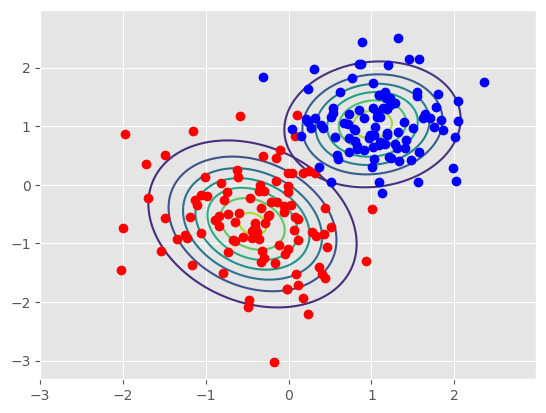

In [10]:
x,y = np.mgrid[-3:3:0.01,-3:3:0.01]
pos = np.dstack((x,y))
rv1 = multivariate_normal(mean = means[0].tolist(),cov = covs[0].tolist())
rv2 = multivariate_normal(mean = means[1].tolist(),cov = covs[1].tolist())

plt.figure()
plt.contour(x,y,rv1.pdf(pos))
plt.contour(x,y,rv2.pdf(pos))
plt.plot(aaa[:,0],aaa[:,1],'ro')
plt.plot(bbb[:,0],bbb[:,1],'ob')

In [22]:
means
print(covs)
print(phi[0])
print(e_mn1_w)

[array([[0.301, 0.026],
       [0.026, 0.306]]), array([[0.399, -0.109],
       [-0.109, 0.513]])]
[0.530 0.470]
[0.000 0.029 0.002 0.002 0.000 0.653 0.000 0.001 0.015 0.000 0.000 0.018
 0.011 0.000 0.022 0.001 0.617 0.014 0.001 0.972 0.000 0.000 0.000 0.001
 0.034 0.000 0.000 0.000 0.004 0.577 0.000 0.002 0.000 0.002 0.031 0.000
 0.084 0.010 0.000 0.013 0.000 0.129 0.001 0.342 0.231 0.000 0.000 0.014
 0.003 0.000 0.027 0.021 0.378 0.000 0.000 0.000 0.003 0.000 0.000 0.007
 0.000 0.001 0.000 0.000 0.130 0.006 0.899 0.000 0.000 0.000 0.004 0.000
 0.006 0.293 0.385 0.102 0.000 0.003 0.000 0.000 0.000 0.000 0.000 0.021
 0.494 0.000 0.000 0.001 0.528 0.000 0.000 0.005 0.000 0.000 0.000 0.000
 0.000 0.008 0.015 0.000 0.994 0.998 1.000 0.998 1.000 0.999 1.000 1.000
 0.999 1.000 1.000 1.000 0.901 0.998 1.000 1.000 0.995 0.990 1.000 1.000
 1.000 0.999 0.997 1.000 0.997 0.999 0.979 0.985 0.998 0.986 1.000 1.000
 1.000 1.000 0.999 0.997 0.993 1.000 1.000 1.000 0.995 0.949 0.999 0.999
 0.998 1.00

In [12]:
# e_mn1_p = np.multiply(e_mn1.pdf(test_set),phi[:,0])
# e_mn2_p = np.multiply(e_mn2.pdf(test_set),phi[:,1])

In [13]:
# e_mn1_w = e_mn1_p/(e_mn1_p+e_mn2_p)
# e_mn2_w = e_mn2_p/(e_mn1_p+e_mn2_p)

In [14]:
# elbo = np.sum(e_mn1_w * np.log(e_mn1_p/e_mn1_w) + e_mn2_w * np.log(e_mn2_p/e_mn2_w))

In [15]:
# phi[:,0] = sum(e_mn1_w)/200
# phi[:,1] = sum(e_mn2_w)/200

In [16]:
# e_mn1_w_ = np.tile(np.expand_dims(e_mn1_w,axis=1),(1,2))
# e_mn2_w_ = np.tile(np.expand_dims(e_mn2_w,axis=1),(1,2))

In [17]:
# means[0] = np.sum(np.multiply(e_mn1_w_,test_set),axis=0) /sum(e_mn1_w) 
# means[1] = np.sum(np.multiply(e_mn2_w_,test_set),axis=0) /sum(e_mn2_w) 


In [18]:
# dummy = 0
# for i in range(test_set.shape[0]):
    
#     dummy+=e_mn1_w[i]*np.outer((test_set[i] - means[0]).T, test_set[i] - means[0])

# covs[0] = dummy/sum(e_mn1_w)

# dummy = 0
# for i in range(test_set.shape[0]):
    
#     dummy+=e_mn2_w[i]*np.outer((test_set[i] - means[1]).T, test_set[i] - means[1])

# covs[1] = dummy/sum(e_mn2_w)

In [19]:
# if elbo - elbo_prev < tol:
#     break
# elbo_prev = elbo